# Predicting if a borrower would default on his loan
* Dataset was obtained from Kaggle
* Project follows the data science pipeline from data wrangling to model deployment and evaluation
* Model involves a multi-layer neural network which utilizes the sigmoid function for binary classification (loan repaid: yes or no)
* A prediction accuracy of 89% was achieved 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
description = pd.read_csv('C:/Datasets/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
description.head(3)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan


**The following is a basic function that describes each term**

In [4]:
def info(col):
    print(description.loc[col]['Description'])

In [5]:
info('int_rate')

Interest Rate on the loan


**Next, we work on the actual dataset with all the data of past borrowers** 

In [6]:
df = pd.read_csv('C:/Datasets/lending_club_loan_two.csv')

In [7]:
df.info()
#It is evident that there is some missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**The objective is to predict loan_status so we will do some EDA**

In [8]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

Text(0.5, 0, 'loan status')

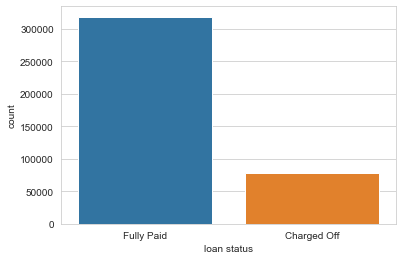

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=df)
plt.xlabel('loan status')

(10.0, 0.0)

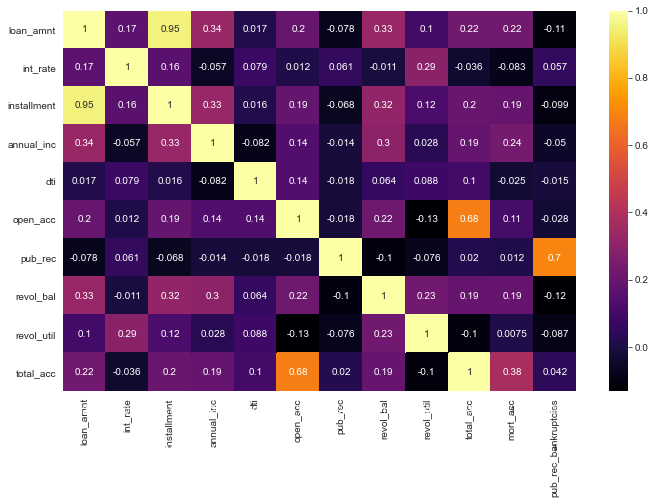

In [10]:
plt.figure(figsize=(11.5,7))
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.ylim(10, 0)

**The above heatmap indicates that there is a strong correlation between the installment (monthly payment) and loan amount.**

In [11]:
info('installment')

The monthly payment owed by the borrower if the loan originates.


In [12]:
info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


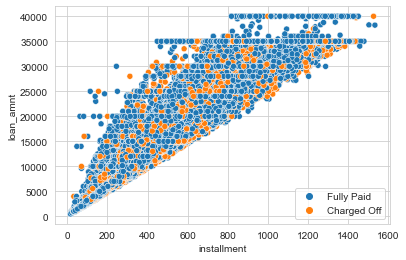

In [13]:
sns.scatterplot(x='installment', y='loan_amnt', data=df,hue='loan_status')
plt.legend(loc='lower right')

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Creating a dummy variable for the loan_status column**

In [15]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1,'Charged Off':0})

In [17]:
df[['loan_repaid','loan_status']].head(5)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<AxesSubplot:>

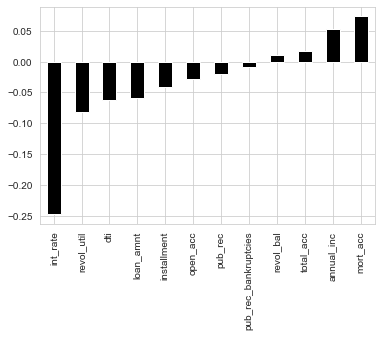

In [18]:
#This plot illustrates the correlation of the numeric features to the loan_repaid column
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(color='k', kind='bar')

**Deal with the missing data and perform feature engineering**

In [19]:
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [20]:
df = df.drop('emp_title',axis=1)

In [21]:
df = df.drop('emp_length',axis=1)

In [22]:
df['purpose'].head(5)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [23]:
df['title'].head(5)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [24]:
# The purpose and title columns repeat information 

In [25]:
df = df.drop('title',axis=1)

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
info('mort_acc')

Number of mortgage accounts.


In [28]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [29]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [30]:
# The total_acc column correlates somewhat with the mort_acc column
info('total_acc')

The total number of credit lines currently in the borrower's credit file


**The missing mort_acc values will be filled based on the corresponding total_acc value. For example, if the mort_acc value is missing, and the corresponding total_acc value is 2, then the mort_acc value will take the value of 0 as this is the average mort_acc value for a total_acc value of 2.**

In [31]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [32]:
total_acc_mean = df.groupby('total_acc').mean()['mort_acc']

In [33]:
def replace_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [34]:
df['mort_acc'] = df.apply(lambda x: replace_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [35]:
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Since the remaining missing data points count for less than 0.5% of the total data, the rows with missing values can be removed.**

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

**All the missing data has been dealt with!**

**String values will have to be converted to numerical features. The following columns are non-numeric.**

In [38]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [39]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [40]:
df['term'] = df['term'].map({' 36 months':36, ' 60 months': 60})

In [41]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [42]:
df = df.drop('grade',axis=1)
# We can drop grade since it is simply a part of the sub_grade feature

In [43]:
# Convert subgrade into dummy variables

In [44]:
subgrade_dummyv = pd.get_dummies(df['sub_grade'],drop_first=True)

In [45]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummyv],axis=1)

In [46]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

**The following columns are the remaining non-numeric columns**

In [47]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [48]:
df = df.drop('loan_status',axis=1)
df = df.drop('issue_d',axis=1)

**The verification_status, application_type,initial_list_status, and purpose columns can all be converted into dummy variables.**

In [49]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

**For the home_ownership column, the number of possible values is reduced and converted to dummy variables.**

In [50]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [51]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [52]:
df['address'].head(4)
# The zip code is the last 5 characters of each address

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
Name: address, dtype: object

In [53]:
# Extract only the zip code from the address 
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [54]:
df['zip_code'].head(3)

0    22690
1    05113
2    05113
Name: zip_code, dtype: object

In [55]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [56]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop('zip_code',axis=1)
df = df.drop('address',axis=1)
df = pd.concat([df,dummies],axis=1)

In [57]:
df['earliest_cr_line']
# This is the last non-numeric column remaining 


0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [58]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)
# Extracted the year only as an integer

In [59]:
df.select_dtypes(['object']).columns
# All columns have been converted to numeric features

Index([], dtype='object')

**Now that the data is cleaned and feature engineering is complete, we move on to machine learning.**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [64]:
# The data is split 80/20 w.r.t to train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [65]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [68]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [69]:
# Train the model 
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 11s 8ms/step - loss: 0.3682 - val_loss: 0.2653
Epoch 2/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2659 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2649 - val_loss: 0.2623
Epoch 4/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2608 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2594 - val_loss: 0.2614
Epoch 6/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2612 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2602 - val_loss: 0.2612
Epoch 8/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2605 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2591 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.25

(0.255, 0.295)

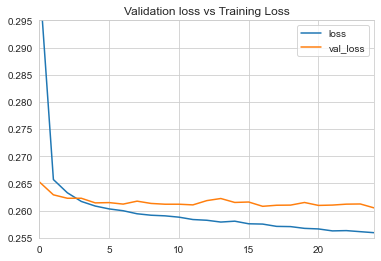

In [79]:
loss = pd.DataFrame(model.history.history)
loss[['loss','val_loss']].plot()
plt.title('Validation loss vs Training Loss')
plt.xlim([0,24])
plt.ylim([0.255,0.295])

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
predict = (model.predict(X_test) > 0.5).astype("int32")

In [86]:
# Model Evaluation
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [87]:
confusion_matrix(y_test,predict)

array([[ 6989,  8669],
       [  214, 63172]], dtype=int64)